# Data Imputation

Data Imputation means **Filling in missing values** instead of dropping them. so you keep as much data as possible.

### Types of imputation
#### 1. Simple imputation -> fast but may ignore data patterns.

| Method                | Description                                         | When to Use                                        |
| --------------------- | --------------------------------------------------- | -------------------------------------------------- |
| **Mean Imputation**   | Replace missing values with the column mean         | Numeric data, symmetric distribution               |
| **Median Imputation** | Replace missing values with the column median       | Numeric data, skewed distribution or with outliers |
| **Mode Imputation**   | Replace missing values with the most frequent value | Categorical data                                   |
| **Constant Value**    | Replace with a fixed value (e.g., 0, "Unknown")     | When missing means a special category              |


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [19]:
df1 = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45, np.nan, 55, 60, 65, 70],  # 1 NaN → 10% here, but reduce rows to <5% in real data
    'Salary': [50000, 52000, 54000, 56000, 58000, 60000, 62000, np.nan, 66000, 68000],
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', np.nan]
})

,Age,Salary,Gender
0,25.0,37039.0,Male
1,30.0,75152.0,Female
2,35.0,49751.0,Male
3,40.0,43694.0,Male
4,45.0,32544.0,Female
5,NaN,32544.0,Male
6,55.0,30898.0,Female
7,60.0,NaN,Female
8,65.0,60168.0,Male
9,70.0,43786.0,NaN


In [4]:
df1.head()

,Age,Salary,Gender
0,25.0,50000.0,Male
1,30.0,52000.0,Female
2,35.0,54000.0,Male
3,40.0,56000.0,Male
4,45.0,58000.0,Female


In [5]:
## Finding missing values in a data
df1.isna().sum()

Age       1
Salary    1
Gender    1
dtype: int64

### In a data misiing value is 1 in each columns

In [6]:
df1['Salary'].describe()

count        9.000000
mean     58444.444444
std       6146.362972
min      50000.000000
25%      54000.000000
50%      58000.000000
75%      62000.000000
max      68000.000000
Name: Salary, dtype: float64

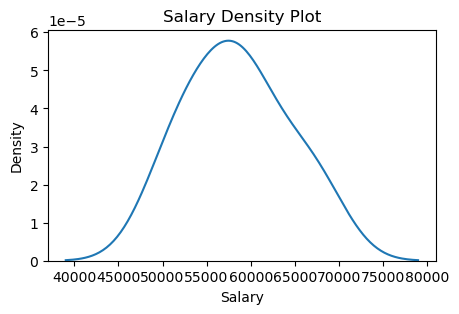

In [17]:
plt.figure(figsize=[5,3])
sns.kdeplot(df1['Salary'])
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Salary Density Plot')
plt.show()

### uniform distribution and Numeric data, symmetric distribution
### use mean for fill NaN values

In [15]:
df1['Salary'].fillna(df1['Salary'].mean(),inplace=True)

In [16]:
df1.isna().sum()

Age       1
Salary    0
Gender    1
dtype: int64

# median

In [20]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45, np.nan, 55, 60, 65, 70],
    'Salary': [50000, 52000, 54000, 56000, 58000, 60000, 62000, np.nan, 66000, 68000],
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', np.nan]
})

# Create right-skewed salary data with one NaN
np.random.seed(42)
skewed_salary = np.random.exponential(scale=15000, size=9) + 30000  # 9 values
skewed_salary = np.round(skewed_salary, 0)
salary_with_nan = list(skewed_salary)[:7] + [np.nan] + list(skewed_salary)[7:]

# Replace Salary column
df1['Salary'] = salary_with_nan

df1


,Age,Salary,Gender
0,25.0,37039.0,Male
1,30.0,75152.0,Female
2,35.0,49751.0,Male
3,40.0,43694.0,Male
4,45.0,32544.0,Female
5,NaN,32544.0,Male
6,55.0,30898.0,Female
7,60.0,NaN,Female
8,65.0,60168.0,Male
9,70.0,43786.0,NaN


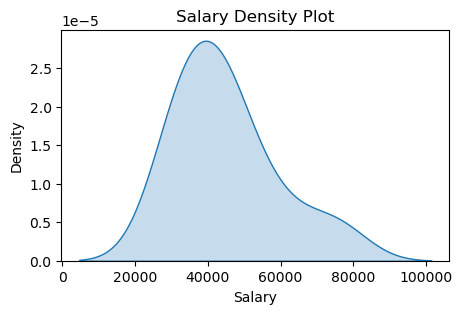

In [36]:
plt.figure(figsize=[5,3])
sns.kdeplot(df1['Salary'],shade=True)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Salary Density Plot')
plt.show()

In [23]:
df1['Salary'].fillna(df1['Salary'].median(),inplace=True)

# For Categorical data

In [30]:
df1.isna().sum()

Age       1
Salary    0
Gender    1
dtype: int64

In [33]:
df1['Gender'].fillna(df1['Gender'].mode()[0],inplace=True)

In [35]:
df1

,Age,Salary,Gender
0,25.0,37039.0,Male
1,30.0,75152.0,Female
2,35.0,49751.0,Male
3,40.0,43694.0,Male
4,45.0,32544.0,Female
5,NaN,32544.0,Male
6,55.0,30898.0,Female
7,60.0,43694.0,Female
8,65.0,60168.0,Male
9,70.0,43786.0,Male


# 2. Statistical / Interpolation Techniques — Uses data trends

| Method                                | Description                                                   | When to Use                       |
| ------------------------------------- | ------------------------------------------------------------- | --------------------------------- |
| **Forward Fill (ffill)**              | Fill missing values with the previous row value               | Time series or sequential data    |
| **Backward Fill (bfill)**             | Fill missing values with the next row value                   | Time series or sequential data    |
| **Linear Interpolation**              | Estimates missing values based on a line between known points | Continuous numeric data           |
| **Polynomial / Spline Interpolation** | Fits a curve to estimate missing values                       | Non-linear trends in numeric data |

In [40]:
data = {'Day':range(1,11),
        'Temp':[30,32,np.nan,35,np.nan,40,42,np.nan,45,47]}
df = pd.DataFrame(data)
df.head()

,Day,Temp
0,1,30.0
1,2,32.0
2,3,NaN
3,4,35.0
4,5,NaN


## ffill ()

In [43]:
df_ffill = df.copy()
df_ffill['Temp']=df_ffill['Temp'].fillna(method='ffill')
df_ffill.head()

,Day,Temp
0,1,30.0
1,2,32.0
2,3,32.0
3,4,35.0
4,5,35.0


## bfill()

In [44]:
df_bfill = df.copy()
df_bfill['Temp'] = df_bfill['Temp'].fillna(method='bfill')

In [46]:
df_bfill.head()

,Day,Temp
0,1,30.0
1,2,32.0
2,3,35.0
3,4,35.0
4,5,40.0


### df[col_name].interpolate()
- Estimates missing values by connecting known points with a straight line.
- Best for numeric data with linear trend.

In [67]:
df_linear = df.copy()
df_linear['Temp'] = df_linear['Temp'].interpolate(method='linear')
df_linear.head()

,Day,Temp
0,1,30.0
1,2,32.0
2,3,33.5
3,4,35.0
4,5,37.5


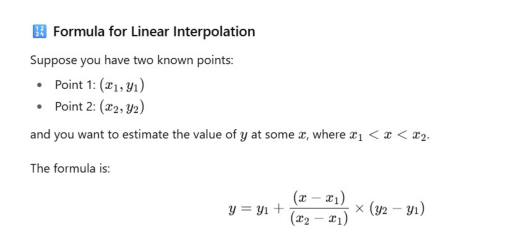

In [56]:
# Load the image
img = mpimg.imread("formula.jpg")

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

In [71]:
df.head()

,Day,Temp
0,1,30.0
1,2,32.0
2,3,NaN
3,4,35.0
4,5,NaN


In [58]:
df_inter = df.copy()
# We need to find the missing value for the 3rd row or record.

In [62]:
x1, x2 = 1, 3
y1, y2 = 32, 35
x = 2
y = y1 + ((x - x1) / (x2 - x1)) * (y2 - y1)
y

33.5

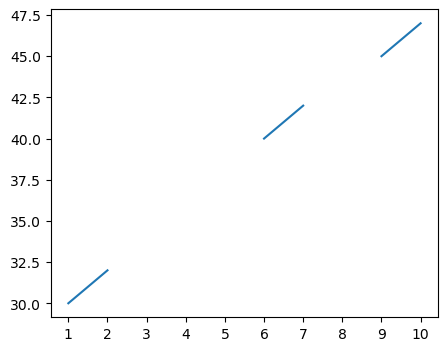

In [72]:
plt.figure(figsize=(5,4))
x = df_inter['Day']
y = df_inter['Temp']
plt.plot(x,y)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

### Polynomial / Spline Interpolation
- Polynomial interpolation is useful when the relationship between data points is non-linear (curved trend instead of straight line).

In [76]:
df_pol = df.copy()
df_pol['Temp'] = df_pol['Temp'].interpolate(method='polynomial',order=2)
df_pol.head()

,Day,Temp
0,1,30.000000
1,2,32.000000
2,3,33.428249
3,4,35.000000
4,5,37.430503


# Advanced Model-Based Imputation — Captures complex patterns

| Method                      | Description                                                                      | When to Use                                    |
| --------------------------- | -------------------------------------------------------------------------------- | ---------------------------------------------- |
| **KNN Imputation**          | Uses k-nearest neighbors to fill missing values based on similarity              | Mixed numeric/categorical data                 |
| **Regression Imputation**   | Predicts missing values using regression models                                  | Numeric data with strong feature relationships |
| **Multiple Imputation**     | Creates several datasets with different imputations and averages results         | When you want uncertainty estimation           |
| **Machine Learning Models** | Use decision trees, random forest, or other algorithms to predict missing values | Complex datasets                               |


### Choosing the Right Method

- **Small missing % (<5%)** → Simple methods (mean/median/mode)
- **Time-series** → Forward/backward fill, interpolation
- **Mixed data types & patterns** → KNN, regression
- **High missingness (>30%)** → Consider dropping columns or advanced ML methods

# Best Practices and Considerations.
- **Understand Data Context:**
  - Assess the significance of missing values and decide whether removal or imputation is appropriate.
- **Document Imputation Strategies:**
  - Keep records of the methods used (why a particular value was chosen) to ensure reproducibility.
- **Combine Strategies if Needed:**
  - Sometimes, a combination of dropping and imputing is necessary based on the nature and volume of missing data.
- **Mind Data Types:**
  - Ensure that the chosen method (especially imputation) respects the data types in your DataFrame.